In [1]:
%matplotlib inline

##Main functions:
    - Generate the secondray structure of the given sequence.
    - Generate graph from the sequence.
    - Display the generated graph without the basepair relation.
    - Recognize basepairs and add them to the graph generated graph.

In [2]:
import subprocess as sp
import networkx as nx
import re

class SequenceGraphGenerator(object):
    def __init__(self):
        pass
        
    #generate graph from the sequence
    def string_to_graph(self, seq):
        seq= seq[0]
        G = nx.Graph()
        for i,letter in enumerate(seq):
            G.add_node(i, label = seq[i])
            if i > 0:
                G.add_edge(i-1, i, label = 'x')
        return G
    
    
class SecondaryStructureGraphGenerator(object):
    # A class tha take a sequence and apply the RNAfold then generate Networkx graph from it's structure
    # sequence='ACGUAGCUAGCUAGCAGUCUAGCUAGCAUCG'
    #Generate the secondray structure of the given sequence
    def __init__(self, mode='RNAfold'):
        self.mode = mode
    
    def fold(self, seq):
        seq, struc = self._get_sequence_structure(seq)
        G = self._make_graph(seq, struc)
        return  G       
        
    def _get_sequence_structure(self, seq):
        if self.mode == 'RNAfold':
            return self._rnafold_wrapper(seq)
        else:
            raise Exception('Not known: %s'% self.mode)
            
    def _rnafold_wrapper(self, sequence):
        flags='--noPS'
        cmd = 'echo "%s" | RNAfold %s' % (sequence, flags)
        out = sp.check_output(cmd, shell=True)
        text = out.strip().split('\n')
        seq= text[0]
        struc= text[1].split()[0]
        return seq, struc

    #Recognize basepairs and add them to the generated graph
    def _make_graph(self, seq, struc):
        print ("seq", seq)
        print ("struc", struc)
        open_pran = "("
        close_pran = ")"
        stack_o = []
        stack_c = []
        G = nx.Graph()
        seq_struc_zip = zip(seq, struc) 
        #print seq_struc_zip
        for i, k in enumerate(struc):
            G.add_node(i, label = seq[i])
            if i > 0:
                G.add_edge(i-1, i, label= 'x')
                if struc[i] == open_pran:
                    j = i
                    stack_o.append(struc[j])
                if struc[i] == close_pran:
                    stack_c.append(struc[i])
                    stack_o.pop()
                    j= j-1
                    stack_c.pop()
                    G.add_edge(i, j, label = 'b')
        return G

##Experiment

('seq', 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC')
('struc', '.....(((((((((.((((.((....)))))))))))))))....')


/home/alshaikm/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/alshaikm/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


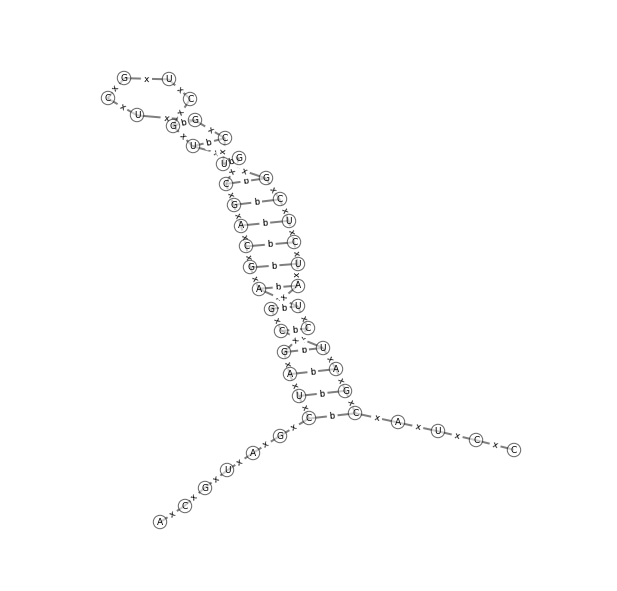

In [3]:
seq = 'ACGUAGCUAGCUAGCAGCGUGCUGCUGCUGCUCUAGCUAGCAUCC'
gen = SecondaryStructureGraphGenerator(mode='RNAfold')
G = gen.fold(seq)
from eden.util import display
display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

#New tasks:
- make a functoin that read a fasta file from disk and yields (header, seq) pairs +
- ex from:
>AB003409.1/96-167
GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUC
CCAGUGGGUCCA
>AB009835.1/1-71
CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUU
ACUUCUAAUGA
yield:
(AB003409.1/96-167, GGGCCCAUAGCUCAGUGGUAGAGUGCCUCCUUUGCAAGGAGGAUGCCCUGGGUUCGAAUCCCAGUGGGUCCA)
(AB009835.1/1-71,CAUUAGAUGACUGAAAGCAAGUACUGGUCUCUUAAACCAUUUAAUAGUAAAUUAGCACUUACUUCUAAUGA)

- make a function that receives in input the list of sequences, and yields structure graphs +
- make a function that receives a iterator over graphs and i,j and plots only graphs from num i to num j

In [16]:
%matplotlib inline
import os, sys
import subprocess as sp
import networkx as nx
import re

# read a fasta file separate the head and the sequence
def readFastaFile():
    path = "/home/alshaikm/EDeN_examples/fastaFiles"
    for file in os.listdir(path):
        print ("file:", file)
#        for line in file:
            read_file = open(os.path.join( path, file),'r')
            for line in read_file:
                print ("line", line)    
                text = line.strip().split('\n')          
                print ("text", text)
                text2 = line.splitlines()
                print ("text2:", text2)
                text_sep = re.split('(\d+)',line)
                print ("text_sep", text_sep)
                seq = text_sep
                print ("seq_sep:", seq)
#                head = text_sep[0].split()[9]
#                print ("head_sep:", head)
                
                
                
                
#                text = line.strip().split()
#                print ("line", line)
#                print ("text", text)
#                head= text[0]
#                print ("head_sep:", head)
#                head2 = text.split('0123456789', text)
#                head2 = text.rstrip('0123456789')
#                print ("head_sep:", head)
#                seq= text[1].split()[0]

#                head = line.split('0123456789')
#                seq = line[len(head):]
#                print ("seq_sep:", seq)
        #print ("read", file)
        #file += file
        return seq
        #return head, seq
    
    


#generate the graph for each read sequence
def string_to_graph(seq):
    print ("seq", seq)
    seqs = list(seq)
    print ("seqs", seqs)
    G = nx.Graph()
    for i,letter in enumerate(seqs):
        print "here"
        print ("seqs2", seqs)
        G.add_node(i, label = seqs[i])
        print ("seqs[i]", seqs[i])
        if i > 0:
            G.add_edge(i-1, i, label = 'x')
    return G

('file:', 'RF00006.fasta.txt')
('line', '>M17309.1/99-171\n')
('text', ['>M17309.1/99-171'])
('text2:', ['>M17309.1/99-171'])
('text_sep', ['>M', '17309', '.', '1', '/', '99', '-', '171', '\n'])
('seq_sep:', ['>M', '17309', '.', '1', '/', '99', '-', '171', '\n'])
('line', 'GGGAUUGUAGUUUAAUGGUUAGAGCACCGCCCUGUCACGGCGGAAGUUGCGGGUUCGAGUCCCGUCAGUCCCG\n')
('text', ['GGGAUUGUAGUUUAAUGGUUAGAGCACCGCCCUGUCACGGCGGAAGUUGCGGGUUCGAGUCCCGUCAGUCCCG'])
('text2:', ['GGGAUUGUAGUUUAAUGGUUAGAGCACCGCCCUGUCACGGCGGAAGUUGCGGGUUCGAGUCCCGUCAGUCCCG'])
('text_sep', ['GGGAUUGUAGUUUAAUGGUUAGAGCACCGCCCUGUCACGGCGGAAGUUGCGGGUUCGAGUCCCGUCAGUCCCG\n'])
('seq_sep:', ['GGGAUUGUAGUUUAAUGGUUAGAGCACCGCCCUGUCACGGCGGAAGUUGCGGGUUCGAGUCCCGUCAGUCCCG\n'])
('line', '>X12890.1/1972-2045GGGCUAUUAGCUCAGUUGGUUAGAGCAUACCCUUGAUAAGGGUAAGGUCGCUAGUUCAAGUCUAGCAUGGCCCU\n')
('text', ['>X12890.1/1972-2045GGGCUAUUAGCUCAGUUGGUUAGAGCAUACCCUUGAUAAGGGUAAGGUCGCUAGUUCAAGUCUAGCAUGGCCCU'])
('text2:', ['>X12890.1/1972-2045GGGCUAUUAGCUCAGUUGGUUAGAGCAUACCCUU

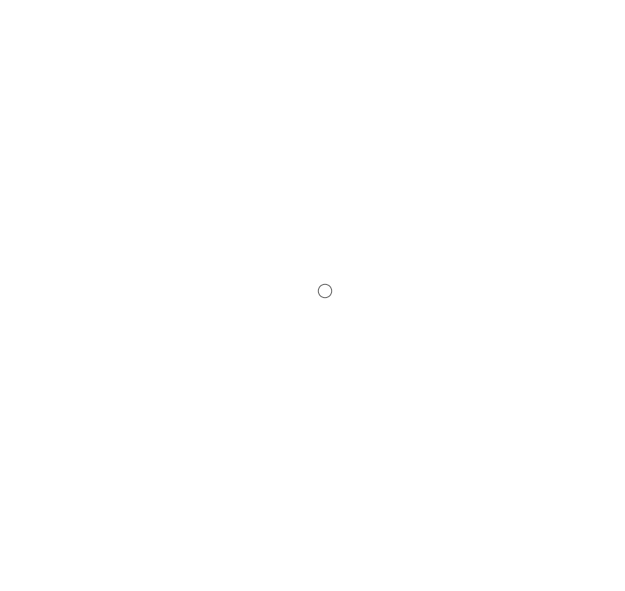

In [17]:
from eden.util import display
sequence = readFastaFile()
print ("sequence:", sequence)
for i in sequence:
    G = string_to_graph(sequence)
    display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

In [7]:
import subprocess as sp
import networkx as nx
import re
import os, sys
class FastaSequenceGraphGenerator(object):
    def __init__(self):
        pass
    
    def graphGenerator(self):
        seq = self._readFastaFile()
        print ("seq", seq)
#        seqs = list(seq)
        for i,j in enumerate(seq):
            print ("seq", seq)
            print ("i", i)
            print ("j", j)
            G = self._string_to_graph(seq)
        return G
    
    # read a fasta file separate the head and the sequence
    def _readFastaFile(self):
        path = "/home/alshaikm/EDeN_examples/fastaFiles"
        for file in os.listdir(path):
            print ("file:", file)
            for line in file:
                fi = open(os.path.join( path, file),'r')
                #seperate the head and the sequence
                for line in fi:
                    head = line.rstrip('0123456789')
                    seq = line[len(head):]
        #            print line
          #          print head
#                    print seq
            return head, seq
        
    #generate graph from the sequence extracted from fasta file
    def _string_to_graph(self, seq):
        seqs = list(seq)
        G = nx.Graph()
        for i,letter in enumerate(seqs):
            G.add_node(i, label = seq[i])
            if i > 0:
                G.add_edge(i-1, i, label = 'x')
        return G

#Experiment

('file:', 'RF00005.fasta.txt')
('seq', ('CCUUCAUGGCUCA\n', ''))
('seq', ('CCUUCAUGGCUCA\n', ''))
('i', 0)
('j', 'CCUUCAUGGCUCA\n')
('seq', ('CCUUCAUGGCUCA\n', ''))
('i', 1)
('j', '')


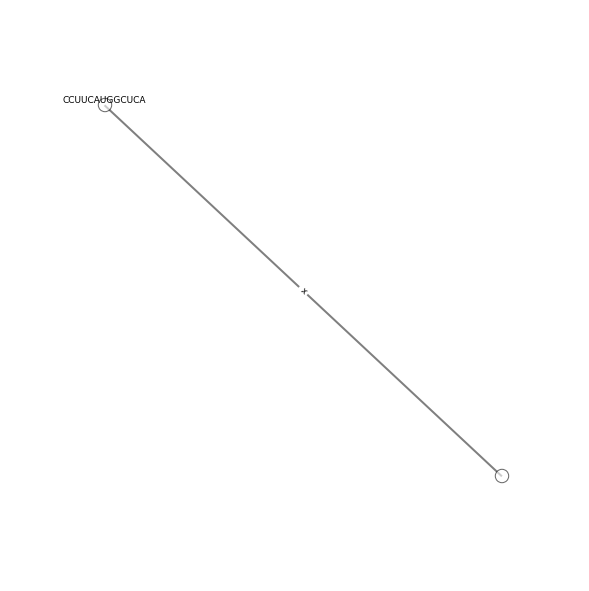

In [51]:
gen = FastaSequenceGraphGenerator()
G = gen.graphGenerator()
from eden.util import display
display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

In [6]:
readFastaFile()
G_seq = SequenceGraphGenerator()
seq = readFastaFile()
G = G_seq.string_to_graph(seq)
from eden.util import display
display.draw_graph(G, node_size=180, font_size=9, node_border=True, prog='neato')

TypeError: 'generator' object has no attribute '__getitem__'